## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
import folium

%pip install geopy
from geopy.geocoders import Nominatim

from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


## Database Connection

In [2]:
#creating database connection
conn = sqlite3.connect('yelp.db')

In [3]:
tables = pd.read_sql_query("SELECT name from sqlite_master where type = 'table'", conn)

In [4]:
tables

,name
0,business
1,review
2,user
3,tip
4,checkin


In [5]:
# explore the type of data available in the tables
for table in tables['name']:
    display(pd.read_sql_query(f"select * from {table} limit 5", conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,nN1EWUFB6G5vXLCGMnFpow,V5jfkywq-f4FpvDrUJMdfw,Zg83olSjsdXAhE5EEy5IcQ,5.0,1,0,0,This has been one of our favorite restaurants ...,2014-07-19 05:25:16
1,gs6qP-N4oV-Fr8dpqowiIQ,l3YDgKIUhVLXKq8fYOR5NA,YGXh3EWuaZHWucYfyxQFUg,5.0,25,2,0,I recently graduated from Galen and passed my ...,2016-10-23 15:59:02
2,e0BM_gXdhJzswPSWEizItA,Kho08pWNfeGnRbZTnMKy3w,KoE-tbMBF33yHhuALmIezw,4.0,4,1,4,Spavia Day Spa was just the pampering that I n...,2019-04-09 15:52:12
3,n3JX4UuW_TY59a3wIG0tiQ,ooHF-vRzlkyN9UEVMKocAQ,5rSg5FARufPsy_ACLLhy-g,4.0,14,4,11,Chewing over which bakery in Tampa to visit fo...,2021-12-26 12:32:24
4,6RvdhphGmuAkBX8Yf4kYKw,VIx1vpiXv3xAZ3sE8qGk2Q,9sOHuGGwb8uRVu7pANSWfg,4.0,1,0,1,Brought a group of 23 high school students to ...,2019-02-20 14:20:20


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,vNY6s9bjdWIAkBA1_Mrx2A,Raynette,2,2013-07-19 21:32:15,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1,3TToR8dHguy972ddX3addg,Nick,8,2012-04-08 21:13:53,3,0,1,,None,0,...,0,0,0,0,0,0,0,0,0,0
2,5cX27IFFLLso9JMOroUeWw,Alex,2,2018-03-22 19:21:36,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
3,PF8gWW6_iLowsAIOOVMuRg,Lynn,15,2012-03-22 14:19:36,19,0,1,,None,0,...,0,0,0,0,0,0,0,0,0,0
4,RFJJ1KemTPY0kFCE_NOavw,Edward,1,2015-04-12 00:10:34,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


## Data Analysis

In [6]:
pd.read_sql_query("select count(*) from business", conn)

,count(*)
0,150346


In [7]:
business_id = pd.read_sql_query("""select business_id, review_count from business where lower(categories) like '%restaurant%' and is_open =1""", conn)

In [8]:
# What is the descriptive stats for review count and star rating for businesses?
# avg, min, max, median
pd.read_sql_query(f"""
SELECT avg(review_count), 
min(review_count), 
max(review_count) AS max_review_count ,
(SELECT review_count from business order by review_count limit 1 offset (select count(*) from business) /2) as median_review_count,

avg(stars) AS average_star_rating,
MIN(stars) AS min_star_rating,
MAX(stars) AS max_star_rating,
(SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET(SELECT COUNT(*) FROM business) /2) AS median_star_rating

from business
where business_id IN {tuple(business_id['business_id'])};

""", conn).transpose()

,0
avg(review_count),104.097789
min(review_count),5.000000
max_review_count,7568.000000
median_review_count,15.000000
average_star_rating,3.523969
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [9]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [10]:
business_id = remove_outliers(business_id, 'review_count')


In [11]:
business_id.shape

(31537, 2)

In [12]:
pd.read_sql_query(f"""
SELECT avg(review_count), 
min(review_count), 
max(review_count) AS max_review_count ,
(SELECT review_count from business order by review_count limit 1 offset (select count(*) from business) /2) as median_review_count,

avg(stars) AS average_star_rating,
MIN(stars) AS min_star_rating,
MAX(stars) AS max_star_rating,
(SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET(SELECT COUNT(*) FROM business) /2) AS median_star_rating

from business
where business_id IN {tuple(business_id['business_id'])};

""", conn).transpose()

,0
avg(review_count),55.975426
min(review_count),5.000000
max_review_count,248.000000
median_review_count,15.000000
average_star_rating,3.477281
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [13]:
# Which restaurants have the highest number of reviews?

pd.read_sql_query(f"""select name, sum(review_count) as review_count, avg(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])}
group by name
order by review_count desc
limit 10""", conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [14]:
pd.read_sql_query(f"""select name, sum(review_count) as review_count, avg(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])}
group by name
order by avg_rating desc
limit 10""", conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [15]:
# define a success score based on both review count and average rating
# Do restaurants with higher engagement have higher rating?
pd.read_sql_query("""select business_id,

sum(length(date) - length (replace(date,',',''))+1) as checkin_count from checkin

group by business_id """, conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [16]:
pd.read_sql_query("""select business_id, count(*) as tip_count
from tip 
group by business_id """
                  , conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [17]:
review_count_df = pd.read_sql_query(f"""SELECT total.avg_rating as rating,
AVG(total.review_count) as avg_review_count,
AVG(total.checkin_count) as avg_checkin_count,
AVG(total.tip_count) as avg_tip_count
FROM
(SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ', ', '')) + 1) AS checkin_count,
    SUM(tip.tip_count) as tip_count
FROM 
    business b
LEFT JOIN 
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id) as total
    
GROUP BY total.avg_rating

""", conn)

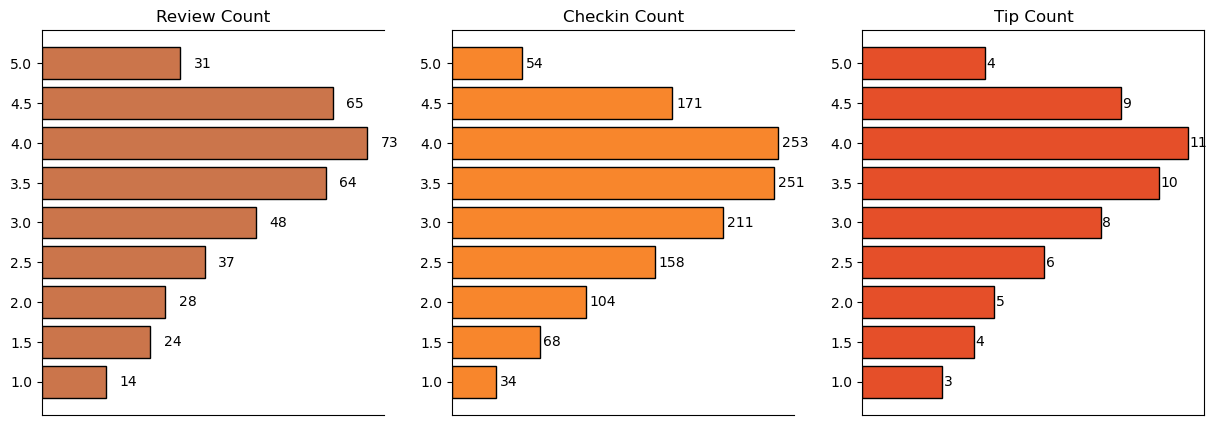

In [18]:
plt.figure(figsize=(15,5))
plt.title('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title('Review Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df ['avg_review_count'], edgecolor = 'k', color = '#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value+3, i, str(round (value)), color='black', va='center')
                 
                 
plt.xticks([])
plt.subplot(1,3,2)
plt.title('Checkin Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df ['avg_checkin_count'], edgecolor = 'k', color = '#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df ['avg_checkin_count']):
    plt.text(value+3, i, str(round (value)), color='black', va='center')
                                                                    

plt.xticks([])
plt.subplot(1,3,3)
plt.title('Tip Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df ['avg_tip_count'], edgecolor = 'k',color='#E54F29') 
for i, value in enumerate (review_count_df ['avg_tip_count']):
    plt.text(value+0.05, i, str(round (value)), color='black', va='center')
plt.xticks([])
plt.show()
                                                                    

In [19]:
#Is there a correlation between the number of reviews, tips, and check-ins for a business?
engagement_df = pd.read_sql_query(f"""
SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ', ', '')) + 1) AS checkin_count,
    SUM(tip.tip_count) as tip_count,
    (CASE WHEN b.stars >= 3.5 Then 'High-Rated' Else 'Low-Rated' END) as category
FROM 
    business b
LEFT JOIN 
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id

""", conn).dropna()

In [20]:
engagement_df[['review_count', 'checkin_count', 'tip_count']].corr()
#correlation coeeficient > 0.5 indicates positive correlation

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


<Axes: >

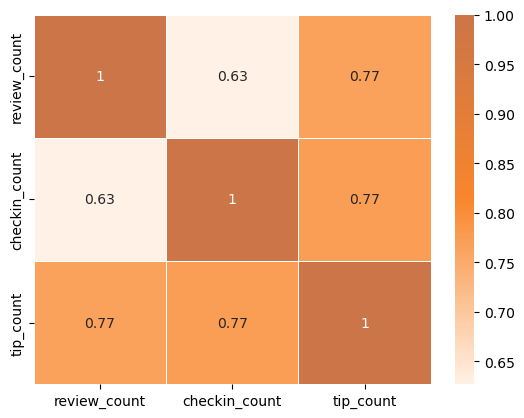

In [21]:
colors = ['#FFF1E5', "#F8862C", "#CB7548"]
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)
sns.heatmap(engagement_df[['review_count', 'checkin_count', 'tip_count']].corr(), cmap = custom_cmap, annot = True, linewidth = 0.5)

In [22]:
#Is there a difference in  the user engagement (reviews, tips, and check-ins) between high-rated and low-rated businesse
engagement_df.groupby("category")[['review_count', 'tip_count', 'checkin_count']].mean()

#high rated restaurants have higher rating than low rated restaurants

,review_count,tip_count,checkin_count
category,,,
High-Rated,72.291062,10.162766,243.133282
Low-Rated,42.123420,6.541689,176.761657


In [23]:
#function to calculate the success score based on the avg rating and total review count; weighted rating
def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] +1)
        success_score.append(score)
    return success_score

In [71]:
#How do the success metrics (review_count or avg_rating) of restaurants vary across different states and cities?
city_df = pd.read_sql_query(f"""select city, state, latitude, longitude, AVG(stars) as avg_rating, SUM(review_count) as review_count,
count(*) as restaurant_count
from business
WHERE business_id IN {tuple(business_id['business_id'])}
group by state, city
order by review_count desc
limit 10""", conn)

city_df['success_score'] = calculate_success_metric(city_df)

In [72]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [26]:
#Create a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

#Define a color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                   vmin=city_df['sucess_score'].min(),
                                   vmax=city_df['sucess_score'].max())

#Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['sucess_score']),
        fill=True,
        fill_color=color_scale(row['sucess_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['sucess_score']}"
        ).add_to(m)
    
#Add color to the map
m.add_child(color_scale)

In [27]:
#Are there any patterns in user engagement over time for successful businesses compared to less successful ones?
#Are there any seasonal trends in the user engagement for restaurants?

high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM 
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars >= 3.5

GROUP BY month_year

ORDER BY month_year) as review

JOIN

(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count

FROM tip

JOIN business as b

on tip.business_id = b.business_id

WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars >= 3.5

GROUP BY month_year

ORDER BY month_year) as tip



on review.month_year = tip.month_year 
;""", conn)




low_rated_engagement = pd.read_sql_query(f"""

SELECT review.month_year, review.review_count, tip.tip_count FROM

(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count

FROM review

WHERE business_id IN {tuple(business_id['business_id'])} and stars < 3.5

GROUP BY month_year

ORDER BY month_year) as review

JOIN

(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count

FROM tip

JOIN business as b

on tip.business_id = b.business_id

WHERE tip.business_id IN {tuple (business_id ['business_id'])} and b.stars < 3.5

GROUP BY month_year

ORDER BY month_year) as tip

on review.month_year = tip.month_year ;""", conn)

In [28]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2020,2,1257
1,01-2022,6,328
2,02-2014,1,1440
3,02-2019,2,1300
4,02-2020,2,1195
5,02-2021,1,916
6,03-2012,1,1565
7,03-2016,1,1853
8,03-2020,3,878
9,04-2016,1,1714


In [29]:
time_rating = pd.read_sql_query(f"""SELECT strftime('%m-%Y', date) AS month_year, AVG(stars) as avg_rating
FROM review
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year
;""", conn)

In [30]:
time_rating
#average rating of entire business per month

,month_year,avg_rating
0,01-2012,3.000000
1,01-2020,4.000000
2,01-2022,3.666667
3,02-2014,5.000000
4,02-2018,3.000000
5,02-2019,4.500000
6,02-2020,4.500000
7,02-2021,5.000000
8,03-2012,5.000000
9,03-2016,5.000000


In [69]:
#How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?
sentiment_df = pd.read_sql_query(f"""SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count,

SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count

FROM

(SELECT business_id,

    SUM(useful) as useful_count, 
    SUM(funny) as funny_count, 
    SUM(cool) as cool_count

FROM

    review

GROUP BY business_id) as s 
JOIN business as b on b.business_id = s.business_id

WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id 
ORDER BY review_count""", conn)

sentiment_df = remove_outliers(sentiment_df,'review_count')
sentiment_df = remove_outliers(sentiment_df,'useful_count')
sentiment_df = remove_outliers(sentiment_df,'funny_count')
sentiment_df = remove_outliers(sentiment_df,'cool_count')

In [70]:
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count
0,iWFK7U-wBR-68X0VFrSkNA,4.5,11,0,1,0
1,YNWEM2NVocUl6d74yRvpug,3.5,12,0,0,0
2,xWciUYcV1VEVEWAHak29Hg,3.0,14,3,1,0
3,Yzh7Xo1_JBDWUl2BzRiYaQ,4.0,15,0,0,0
4,cn3GfkDkzhwWBKDNgsiQLA,2.5,15,2,1,0
...,...,...,...,...,...,...
78,rueQ9RiqrN8E5Lb3EyFuTg,4.5,221,1,0,1
80,W1aLlzTpnF6ue27JDTiTtw,4.0,227,3,0,1
81,j93v-we-LGGr3b-K9DDG5Q,4.0,231,2,0,1
82,q0Q-ohZp8iV9OY-gkNPPwg,4.0,232,0,0,0


In [73]:
sentiment_df['sucess_score'] = calculate_success_metric(sentiment_df)

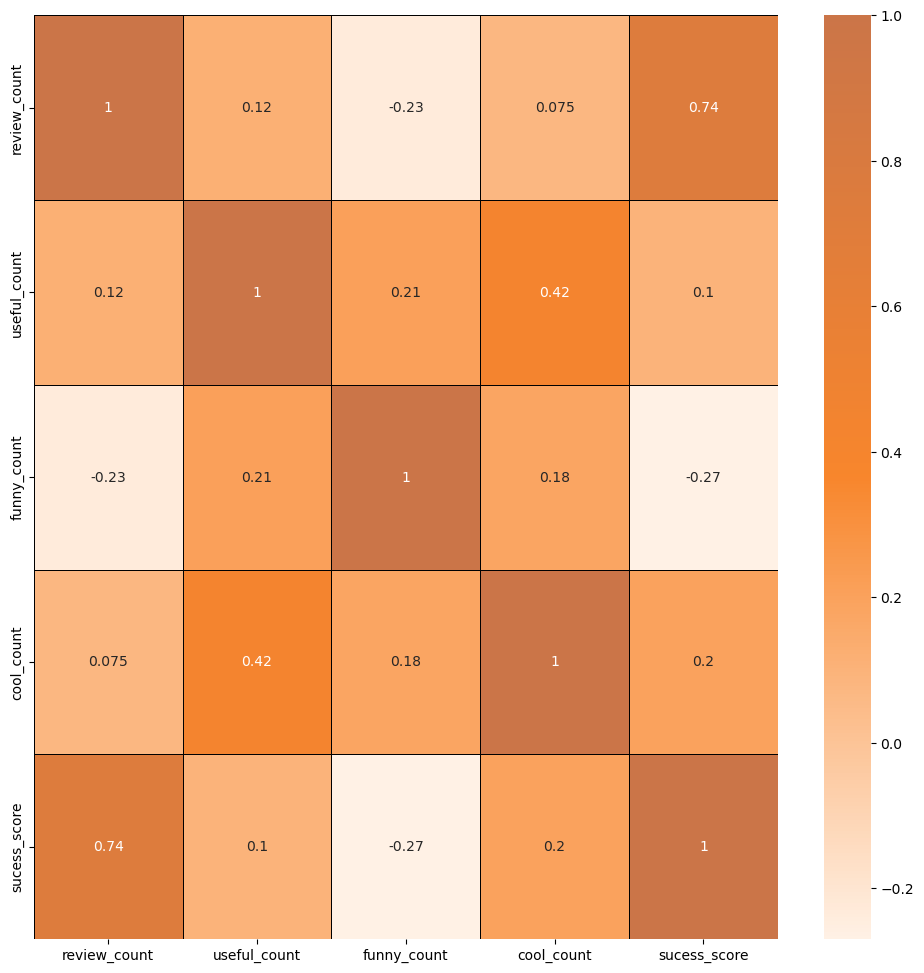

In [75]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(), cmap = custom_cmap, annot = True, linewidth = 0.5, linecolor='black')
plt.show()

In [79]:
# Is there any difference in engagement of elite users and non-elite users?
elite_df = pd.read_sql_query("""SELECT
    elite,
    COUNT(*) AS num_users, 
    SUM(review_count) AS total_review_count

FROM

    (SELECT
        CASE 
            WHEN elite = '' THEN 'Not Elite' 
            ELSE 'Elite' 
        END AS elite,
        u.review_count
    FROM
        user u) AS user_elite

GROUP BY
    elite;
""", conn)

In [80]:
elite_df

,elite,num_users,total_review_count
0,Elite,3,133
1,Not Elite,7894,39494


In [90]:
for table in tables['name']:
    display(pd.read_sql_query(f"select * from {table} limit 10", conn))


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"Sporting Goods, Fashion, Shoe Stores, Shopping..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,"Synagogues, Religious Organizations"
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"Pubs, Restaurants, Italian, Bars, American (Tr..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,nN1EWUFB6G5vXLCGMnFpow,V5jfkywq-f4FpvDrUJMdfw,Zg83olSjsdXAhE5EEy5IcQ,5.0,1,0,0,This has been one of our favorite restaurants ...,2014-07-19 05:25:16
1,gs6qP-N4oV-Fr8dpqowiIQ,l3YDgKIUhVLXKq8fYOR5NA,YGXh3EWuaZHWucYfyxQFUg,5.0,25,2,0,I recently graduated from Galen and passed my ...,2016-10-23 15:59:02
2,e0BM_gXdhJzswPSWEizItA,Kho08pWNfeGnRbZTnMKy3w,KoE-tbMBF33yHhuALmIezw,4.0,4,1,4,Spavia Day Spa was just the pampering that I n...,2019-04-09 15:52:12
3,n3JX4UuW_TY59a3wIG0tiQ,ooHF-vRzlkyN9UEVMKocAQ,5rSg5FARufPsy_ACLLhy-g,4.0,14,4,11,Chewing over which bakery in Tampa to visit fo...,2021-12-26 12:32:24
4,6RvdhphGmuAkBX8Yf4kYKw,VIx1vpiXv3xAZ3sE8qGk2Q,9sOHuGGwb8uRVu7pANSWfg,4.0,1,0,1,Brought a group of 23 high school students to ...,2019-02-20 14:20:20
5,VkXr54yJMN4Qu4dRznAN8Q,4jEdEPDNAAa3aS7rYhQ60w,MK0OMY_u9unl8xSqjPLtMw,5.0,3,0,0,"ALWAYS love this place! And it's always busy, ...",2020-01-17 20:58:05
6,68KmeQliXIZv6YniRXom2Q,7bvU6GkGa8fLF0f6wSjIMQ,QdUbpCOvFbYb_RzlPxOonQ,4.0,2,1,2,Yes! I am a fan of the First Watch restaurants...,2020-02-12 19:18:56
7,JA8GCU3glb6TQRExleWjHg,Iq-9jCp219AEcbtjy-ZyNQ,tBWjMqUc0yP5lRElCfDaKg,5.0,1,0,1,"Great pizza, awesome choices of beers, pet fri...",2016-07-25 01:08:01
8,SojQwC_baEFo4N02Is3ohw,EfK2k0G7t1diHPUEqlOrpQ,B4MwUJXe_oCZSZ7Zo3NnIA,5.0,0,0,0,Our son just started cadence and we are very h...,2022-01-08 02:54:59
9,BpjwNpbH6jrdDJBmqT2QCQ,M5ogJkrrJEtR6Ao3rtQqIA,cu-s8VMSSUKPosPS9ktGaw,5.0,0,0,0,What a selection! WOWand not just a wide range...,2020-03-20 17:48:00


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,vNY6s9bjdWIAkBA1_Mrx2A,Raynette,2,2013-07-19 21:32:15,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1,3TToR8dHguy972ddX3addg,Nick,8,2012-04-08 21:13:53,3,0,1,,None,0,...,0,0,0,0,0,0,0,0,0,0
2,5cX27IFFLLso9JMOroUeWw,Alex,2,2018-03-22 19:21:36,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
3,PF8gWW6_iLowsAIOOVMuRg,Lynn,15,2012-03-22 14:19:36,19,0,1,,None,0,...,0,0,0,0,0,0,0,0,0,0
4,RFJJ1KemTPY0kFCE_NOavw,Edward,1,2015-04-12 00:10:34,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
5,HwyiGhXn3pavxULDeWNsQA,Mike,5,2012-07-15 02:29:52,2,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
6,Gwo210gnnOlr0WSIuSn42g,Steph,18,2013-05-12 01:24:12,23,3,14,,None,0,...,0,0,0,0,0,0,0,0,0,0
7,CNU5fBpvkCrmaHWrJ9bljg,Tracy,4,2017-09-27 19:05:07,1,0,1,,None,0,...,0,0,0,0,0,0,0,0,0,0
8,f38Vp9ayzgFapCv_hCUMsA,Holly,4,2021-08-11 16:51:42,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
9,N-okHfDS_zVH4b6rKL16HA,Susan,1,2014-01-08 02:22:25,1,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
5,trf3Qcz8qvCDKXiTgjUcEg,7Rm9Ba50bw23KTA8RedZYg,"Chili Cup + Single Cheeseburger with onion, pi...",2012-03-13 04:00:52,0
6,SMGAlRjyfuYu-c-22zIyOg,kH-0iXqkL7b8UXNpguBMKg,"Saturday, Dec 7th 2013, ride Patco's Silver Sl...",2013-12-03 23:42:15,0
7,YVBB9g23nuVJ0u44zK0pSA,jtri188kuhe_AuEOJ51U_A,This is probably the best place in the cool Sp...,2016-11-22 22:14:58,0
8,VL12EhEdT4OWqGq0nIqkzw,xODBZmX4EmlVvbqtKN7YKg,Tacos,2012-07-27 01:48:24,0
9,4ay-fdVks5WMerYL_htkGQ,pICJRcyqW1cF96Q3XhLSbw,Starbucks substitute in boring downtown Tampa....,2012-06-09 22:57:04,0


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
5,--8IbOsAAxjKRoYsBFL-PA,"2015-06-06 01:03:19, 2015-07-29 16:50:58, 2015..."
6,--9osgUCSDUWUkoTLdvYhQ,"2015-06-13 02:00:57, 2015-07-04 00:44:09, 2015..."
7,--ARBQr1WMsTWiwOKOj-FQ,"2014-12-12 00:44:23, 2015-01-09 00:19:52, 2015..."
8,--FWWsIwxRwuw9vIMImcQg,"2010-09-11 16:28:39, 2010-12-22 21:14:19, 2011..."
9,--FcbSxK1AoEtEAxOgBaCw,"2017-08-18 19:43:50, 2017-10-07 22:38:38, 2017..."


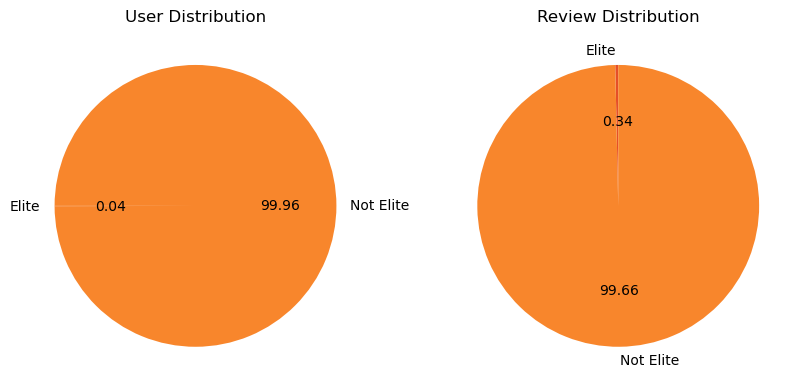

In [93]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['num_users'], labels = elite_df['elite'], autopct='%.2f', startangle = 180, colors = ['#E54F29', '#F8862C'])

plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels = elite_df['elite'], autopct='%.2f', startangle = 90, colors = ['#E54F29', '#F8862C'])
plt.show()

In [95]:
#What are the busiest hours for restaurants?

review_engagement = pd.read_sql_query("""SELECT 
    cast (strftime('%H', date) as integer) 
    as hour, 
    COUNT(*) AS review_count
FROM
    review 
GROUP BY 
    hour; 
""", conn)

tip_engagement = pd.read_sql_query("""SELECT 
    cast (strftime('%H', date) as integer) 
    as hour, 
    COUNT(*) AS tip_count
FROM
    tip 
GROUP BY 
    hour; 
""", conn)

checkin = pd.read_sql_query("""SELECT date FROM checkin""", conn)
checkin_engagement = []
for i in checkin ['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

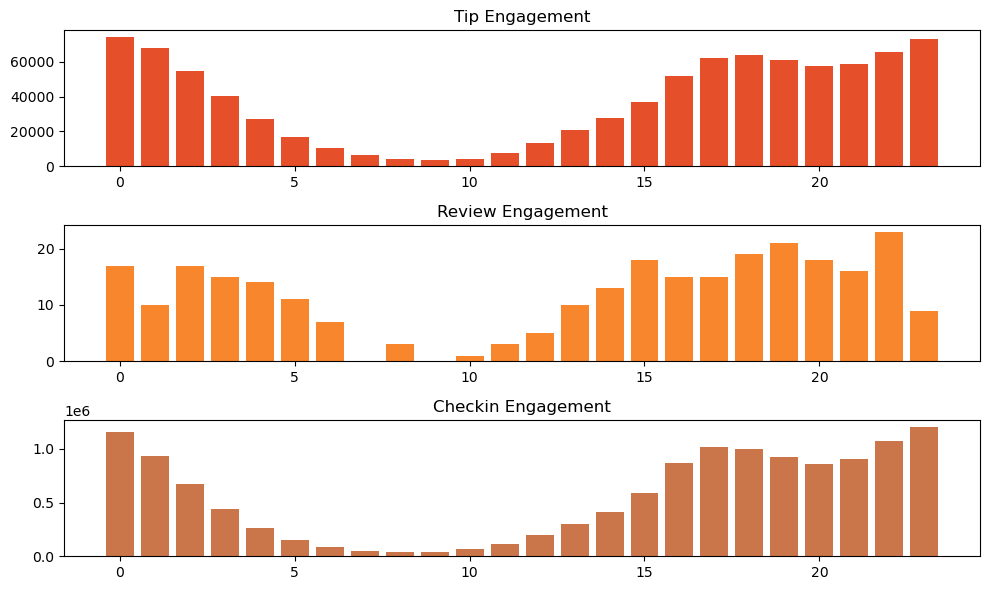

In [96]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'], tip_engagement ['tip_count'], color = '#E54F29')

plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color = '#F8862C')

plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index, checkin_engagement [0], color = '#CB754B')

plt.tight_layout()
plt.show()